### Natural image quality assessment using the IL-NIQE score
Zhang, L., Zhang, L., & Bovik, A. C. (2015). A Feature-Enriched Completely Blind Image Quality Evaluator. IEEE Transactions on Image Processing, 
24(8), 2579–2591. https://doi.org/10.1109/TIP.2015.2426416

In [1]:
%load_ext autoreload
%autoreload 2

import cv2, time
import warnings
import os, time
from tqdm import tqdm

import src.train as train
import src.IL_NIQE as ilniqe
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [5]:
# Model training on pristine natural images
img_path = 'pristine'
with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    time_start = time.time()

    train.train(img_path)

    time_used = time.time() - time_start
print(f'\t time used in sec: {time_used:.4f}')

100%|██████████| 25/25 [29:14<00:00, 70.18s/it]
c:\Users\zbook\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\io\matlab\_mio5.py:493: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  narr = np.asanyarray(source)


	 time used in sec: 1754.6600


In [2]:
img_path = '../test/'
testFiles = sorted(os.listdir(img_path))
scores = []
images = []

with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    time_start = time.time()

    for img_file in tqdm(testFiles):
        img = cv2.imread(os.path.join(img_path, img_file))
        score = ilniqe.calculate_ilniqe(img, 0, input_order='HWC', resize=True, version='python')
        scores.append(score)
        images.append(img)
        
    time_used = time.time() - time_start

100%|██████████| 5/5 [06:12<00:00, 74.59s/it]


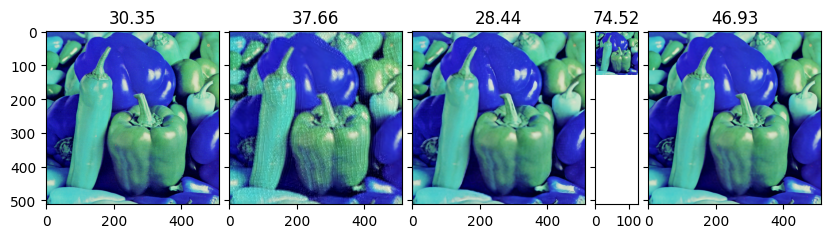

In [9]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

i = 0
for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_title(round(scores[i], 2))
    i= i + 1 

plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

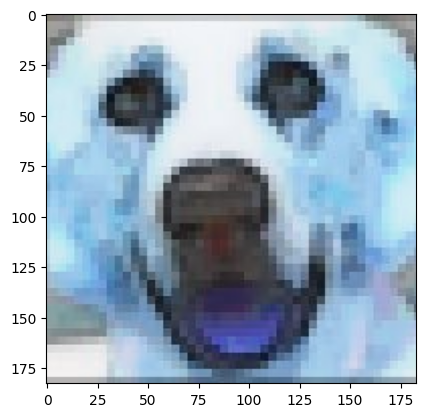

 17%|█▋        | 1/6 [00:00<00:01,  2.74it/s]

52.50106082290212


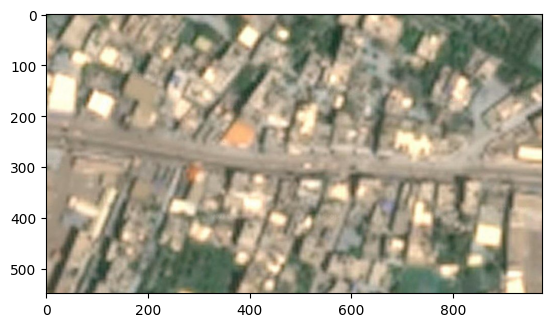

 33%|███▎      | 2/6 [00:00<00:01,  2.48it/s]

63.129814894084674


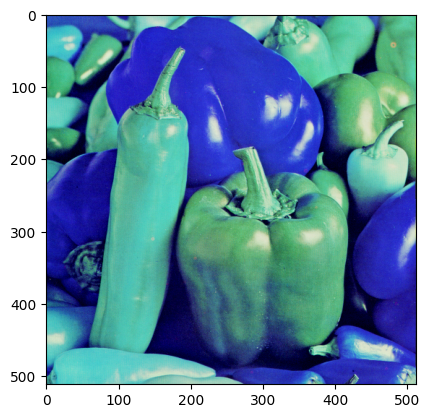

 50%|█████     | 3/6 [00:01<00:01,  2.20it/s]

30.351262976839088


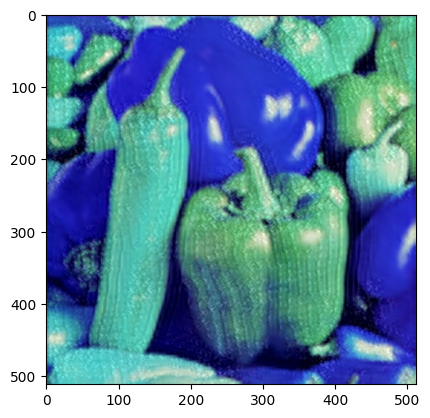

 67%|██████▋   | 4/6 [00:01<00:00,  2.29it/s]

37.65771770908794


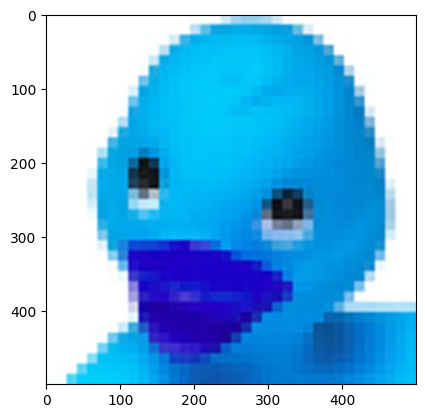

 83%|████████▎ | 5/6 [00:01<00:00,  2.68it/s]

69.95764003023722


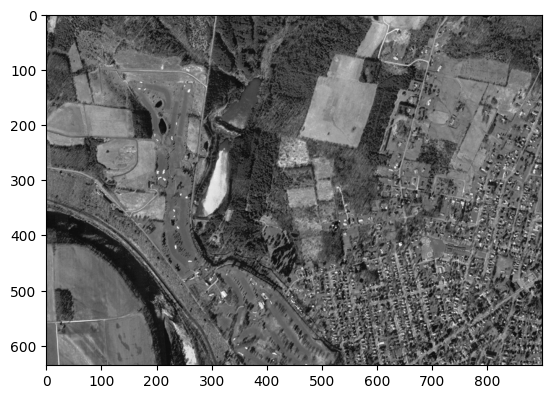

100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

17.56009183496072


In [28]:
for img_file, s in zip(tqdm(testFiles), scores):
    img = cv2.imread(os.path.join(img_path, img_file))
    plt.imshow(img)
    plt.show()
    print(s)

PS: The higher the score, the worse the estimated quality of the image